# Use of resample and flipsp functions

Spectral data are often delivered with decreasing and non-regularly sampled frequencies. This notebook shows how rampy can help you to solve this problem.

In [1]:
%matplotlib inline
import sys
sys.path.append("../")
import numpy as np
import scipy
from matplotlib import pyplot as plt

import rampy as rp
from sklearn import preprocessing

/home/charles/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Creating a fake signal, with decreasing frequencies and irregularly sampled

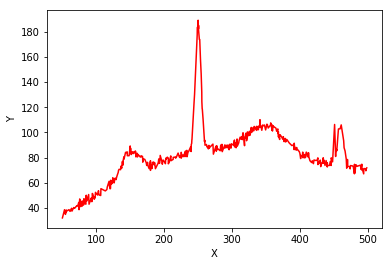

In [2]:
nb_points  =500
x = np.sort(np.random.uniform(50,500,nb_points))[::-1]

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large gaussian + linear 
bkg = 60.0 * np.exp(-np.log(2) * ((x-250.0)/200.0)**2) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg

# spectrum, recorded array
spectrum = np.vstack((x,y)).T

plt.plot(spectrum[:,0],spectrum[:,1],"r-")
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

OK, makes no difference for pyplot but actually x is reversely sorted, and no regularly sampled

In [3]:
print(spectrum[0:10,0])

[498.28068623 497.46685337 496.96704799 495.97786229 493.8984038
 493.72445666 491.65446905 491.26176705 491.12026279 490.96979172]


In [4]:
print("interval 1:"+str(spectrum[1,0]-spectrum[0,0]))
print("interval 2:"+str(spectrum[2,0]-spectrum[1,0]))

interval 1:-0.8138328561419712
interval 2:-0.49980537723996576


We can solve the first problem by using rp.resample(). Note that we could also use numpy.interp(). We will compare both for the sack of example. We first flip the array, then resample it.

In [5]:
spectrum_increasing = rp.flipsp(spectrum)
print(spectrum_increasing[0:10,0])

[50.33283866 53.4390009  54.81355538 54.90196699 55.5688072  55.88209926
 57.34207577 59.91388908 61.67427136 61.91470762]


OK, now the frequencies are in increasing order. This seems not important maybe, but remember than many spline algorithm (including gcvspline or the Dierckx version in scipy) required increasing x values...

Now, we resample on a linearly spaced x axis. When creating x_new, remember that the boundaries should be inside those of the existing frequencies.

In [6]:
x_new = np.arange(round(spectrum_increasing[0,0])+1,round(spectrum_increasing[-1,0])-1,0.8)
y_new_rp = rp.resample(spectrum_increasing[:,0],spectrum_increasing[:,1],x_new)
y_new_np = np.interp(x_new,spectrum_increasing[:,0],spectrum_increasing[:,1])

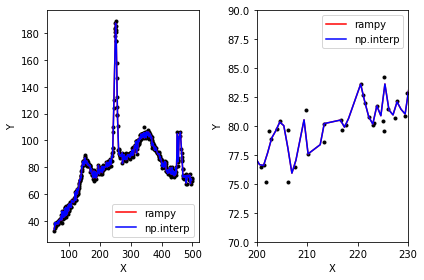

In [7]:
plt.subplot(1,2,1)
plt.plot(spectrum[:,0],spectrum[:,1],"k.")
plt.plot(x_new,y_new_rp,"r-",label="rampy")
plt.plot(x_new,y_new_np,"b-",label="np.interp")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.subplot(1,2,2)
plt.plot(spectrum[:,0],spectrum[:,1],"k.")
plt.plot(x_new,y_new_rp,"r-",label="rampy")
plt.plot(x_new,y_new_np,"b-",label="np.interp")
plt.ylabel("Y")
plt.xlabel("X")
plt.xlim(200,230)
plt.ylim(70,90)
plt.legend()
plt.tight_layout()

As seen below, `rampy.resample` return the same values as `numpy.interp` with the default values. However, we see that the fit is actually not really perfect. This is where `rampy.resample` offers you more: you can choose the type of interpolation done, and other options, as it uses `scipy.interpolate.interp1d` at the low level. See the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

We can try to use a different algorithm and see the result:

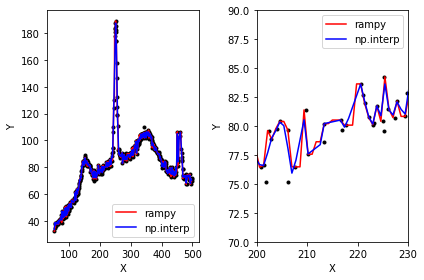

In [8]:
y_new_rp = rp.resample(spectrum_increasing[:,0],spectrum_increasing[:,1],x_new,kind="nearest")
plt.subplot(1,2,1)
plt.plot(spectrum[:,0],spectrum[:,1],"k.")
plt.plot(x_new,y_new_rp,"r-",label="rampy")
plt.plot(x_new,y_new_np,"b-",label="np.interp")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.subplot(1,2,2)
plt.plot(spectrum[:,0],spectrum[:,1],"k.")
plt.plot(x_new,y_new_rp,"r-",label="rampy")
plt.plot(x_new,y_new_np,"b-",label="np.interp")
plt.ylabel("Y")
plt.xlabel("X")
plt.xlim(200,230)
plt.ylim(70,90)
plt.legend()
plt.tight_layout()